# "50 startups."

### _"Predict which companies to invest for maximizing profit" (Regression task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

    
**Метаданные:**
    
* **ID** - startup ID

* **R&D Spend** - how much each startup spends on Research and Development

* **Administration** - how much they spend on Administration cost

* **Marketing Spend** - how much they spend on Marketing

* **State** - which state the startup is based in

* **Category** - which business category the startup belong to

* **Profit** - the profit made by the startup
   

### Questions:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

* ### Import 

In [75]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from scipy import stats
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
%matplotlib inline
# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


* ### Load Data

In [76]:
# read data from '.csv' files
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

# identify target
target = train['Profit']


## Part 2: Exploratory Data Analysis.

* ### Info

In [77]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [78]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head

In [79]:
# preview of the first 5 lines of the loaded Train data 
train.head(10)

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94
5,5,131876.90,99814.71,362861.36,New York,Telecommunications,156991.12
6,6,134615.46,147198.87,127716.82,California,Telecommunications,156122.51
7,7,130298.13,145530.06,323876.68,Florida,Technology,155752.60
8,8,120542.52,148718.95,311613.29,New York,Healthcare,152211.77
9,9,123334.88,108679.17,304981.62,California,Healthcare,149759.96


In [80]:
# preview of the first 5 lines of the loaded Test data 
test.head(10)

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials
5,5,131876.90,99814.71,362861.36,New York,Telecommunications
6,6,134615.46,147198.87,127716.82,California,Telecommunications
7,7,130298.13,145530.06,323876.68,Florida,Technology
8,8,120542.52,148718.95,311613.29,New York,Healthcare
9,9,123334.88,108679.17,304981.62,California,Healthcare


In [81]:
test.describe()

,ID,R&D Spend,Administration,Marketing Spend
count,50.00000,48.000000,48.000000,50.000000
mean,24.50000,76793.349583,123028.223542,224799.600000
std,14.57738,44224.086236,26619.711479,113036.775549
min,0.00000,542.050000,51743.150000,1903.930000
25%,12.25000,45528.002500,105077.645000,138615.667500
50%,24.50000,74661.715000,123467.895000,239000.195000
75%,36.75000,105065.712500,145190.700000,302423.767500
max,49.00000,165349.200000,182645.560000,471784.100000


* ### Observation of target variable

In [82]:
# target variable
target.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [83]:
target.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

C:\Users\Liubava\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

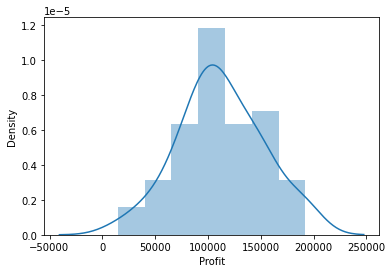

In [84]:
sns.distplot(target) #the function 'distplot' is deprecated, therefore,see next cell

<AxesSubplot:xlabel='Profit', ylabel='Density'>

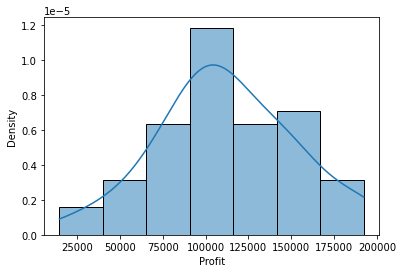

In [85]:
sns.histplot(target,kde=True, stat='density') #almost the same but without warning

In [86]:
# set 'ID' to index
train = train.set_index('ID')
test = test.set_index('ID')
train.head()

,R&D Spend,Administration,Marketing Spend,State,Category,Profit
ID,,,,,,
0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [87]:
# check for Numerical and Categorical features in Train
num_feats_train = train.dtypes[train.dtypes != 'object'].index
print('Quantity of num feats:', len(num_feats_train))
print(train[num_feats_train].columns)
cat_feats_train = train.dtypes[train.dtypes == 'object'].index
print('\nQuantity of categorical feats:', len(cat_feats_train))
print(cat_feats_train)

Quantity of num feats: 4
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

Quantity of categorical feats: 2
Index(['State', 'Category'], dtype='object')


* ### Missing values

#### List of data features with missing values

In [88]:
# check the Train features with missing values 
train.isnull().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64

In [89]:
train.columns[train.isnull().any()]

Index(['R&D Spend', 'Marketing Spend', 'Category'], dtype='object')

In [90]:
# check the Test features with missing values
test.isnull().sum()

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64

In [91]:
test.columns[test.isnull().any()]

Index(['R&D Spend', 'Administration', 'State'], dtype='object')

#### Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

* 'R&D Spend': Numerical - replacement of NAN by 'mean';
* 'Administration': Numerical - replacement of NAN by 'mean';
* 'Marketing Spend': Numerical - replacement of NAN by 'mean';
* 'State': Categorical - replacement of NAN by 'None';
* 'Category': Categorical - replacement of NAN by 'None'.

In [92]:
 # Numerical NAN columns to fill in Train and Test datasets
num_cols_fill = [
    'R&D Spend',
    'Administration',
    'Marketing Spend'
    ]

# replace 'NAN' with 'mean' in these columns
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

# Categorical NAN columns to fill in Train and Test datasets
cat_cols_fill = [
    'State',
    'Category'
]

# replace 'NAN' with 'None' in these columns
for col in cat_cols_fill:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

In [93]:
# check is there any mising values left in Train
#train.columns[train.isnull().any()]
train.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Category           0
Profit             0
dtype: int64

In [94]:
# check is there any mising values left in Test
#test.columns[test.isnull().any()]
test.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Category           0
dtype: int64

#### Visualisation  of Numerical features (regplot)

C:\Users\Liubava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Liubava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Liubava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


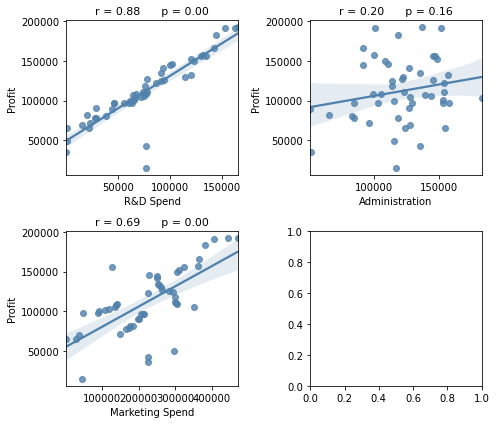

In [95]:
# numerical features visualisation
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(num_feats_train)
not_plot = ['Id',  'Profit']
plot_num_feats = [c for c in list(num_feats_train) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(train[plot_num_feats[i]], train['Profit'], ax = axs[r][c], color = "#5081ac" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()

<AxesSubplot:xlabel='State', ylabel='Profit'>

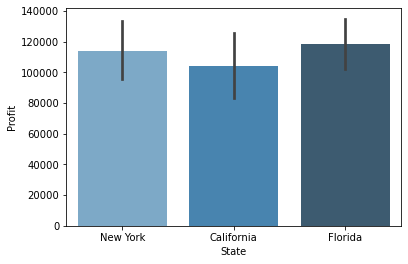

In [96]:
# categorical features visualisation
# 'Profit' split in 'State' level
sns.barplot(x = 'State', y = 'Profit', data=train, palette='Blues_d')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Financials'),
  Text(4, 0, 'Telecommunications'),
  Text(5, 0, 'None'),
  Text(6, 0, 'Oil & Gas')])

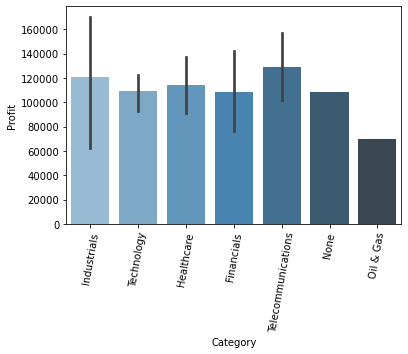

In [97]:
# categorical features visualisation
# 'Profit' split in 'Category' level
sns.barplot(x = 'Category', y = 'Profit', data=train, palette='Blues_d')
plt.xticks(rotation=80)

## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [102]:
# One-Hot Encoding Train dataset
train_dummies = pd.get_dummies(train, columns=['State', 'Category'])
# Drop target variable 
train_dummies = train_dummies.drop('Profit', axis=1)


In [103]:
# preview of the first 5 lines of the loaded Train data 
train_dummies.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0,0


In [104]:
# Train data shape
train_dummies.shape

(50, 13)

In [105]:
# One Hot-Encoding Test dataset
test_dummies = pd.get_dummies(test, columns=['State', 'Category'])

In [106]:
# preview of the first 5 lines of the loaded Test data 
test_dummies.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,0,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,0,1,0,0,0


In [107]:
# Test data shape
test_dummies.shape

(50, 13)

In [108]:
# Drop unnecessary variables 
train_dummies = train_dummies.drop(columns=['Category_None'])
test_dummies = test_dummies.drop(['State_None'], axis=1)

* ### StandardScaler

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(train_dummies)
sc_test = sc.transform(test_dummies)

sc_train = pd.DataFrame(sc_train)
sc_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.065354,0.560753,2.275193,-0.717741,-0.685994,1.393261,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884
1,2.001182,1.082807,2.018631,1.393261,-0.685994,-0.717741,-0.369274,-0.531085,-0.333333,-0.142857,1.128152,-0.294884
2,1.787635,-0.728257,1.687743,-0.717741,1.457738,-0.717741,-0.369274,1.882938,-0.333333,-0.142857,-0.886405,-0.294884
3,1.576120,-0.096365,1.460169,-0.717741,-0.685994,1.393261,2.708013,-0.531085,-0.333333,-0.142857,-0.886405,-0.294884
4,1.523293,-1.079919,1.303473,-0.717741,1.457738,-0.717741,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884


In [111]:
sc_test = pd.DataFrame(sc_test)
sc_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.065354,0.560753,2.275193,-0.717741,-0.685994,1.393261,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884
1,2.001182,1.082807,2.018631,1.393261,-0.685994,-0.717741,-0.369274,-0.531085,-0.333333,-0.142857,1.128152,-0.294884
2,1.787635,-0.728257,1.687743,-0.717741,1.457738,-0.717741,-0.369274,1.882938,-0.333333,-0.142857,-0.886405,-0.294884
3,1.576120,-0.096365,1.460169,-0.717741,-0.685994,1.393261,2.708013,-0.531085,-0.333333,-0.142857,-0.886405,-0.294884
4,1.523293,-1.079919,1.303473,-0.717741,1.457738,-0.717741,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884


* ### Creating datasets for ML part

In [127]:
'''
# set 'X' for features of scaled Train dataset 'sc_train'
X= sc_train

# set 'y' for the target 'Profit'
y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
X_Test = sc_test
'''
X = train_dummies
y = target
X_Test = test_dummies

* ### 'Train\Test' split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [117]:
X_train.shape

(35, 12)

In [118]:
X_test.shape

(15, 12)

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [120]:
# Linear Regression model
LR =LinearRegression()

# Model Training
LR.fit(X_train, y_train)
# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([ 98805.75002446, 120582.06246646, 137745.21283983,  79034.09403155,
       188946.03574103, 118622.88055624,  72254.79066   ,  67164.69815167,
       128666.63674181, 142782.3087556 ,  91593.10175464,  80612.80343627,
       101576.44119369, 101521.36354767, 125192.09524706])

In [142]:
# Model R2 score
LRscore = LR.score(X_test,y_test)
LRscore

0.7896875328347084

In [122]:
# Model Metrics
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y_test,LR_pred),
                          'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.789688,11029.42834,2.030035e+08,14247.930908,0.019417,0.139346


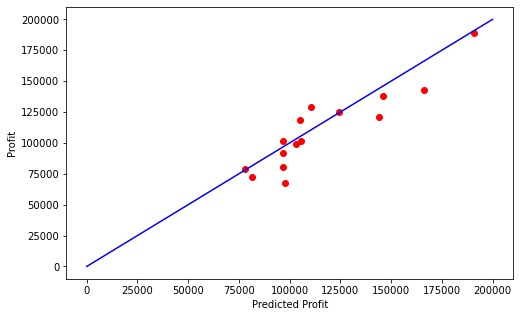

In [123]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, LR_pred,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [128]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1

array([173426.18101741, 189136.03555658, 188946.03574103, 172036.55217563,
       142782.3087556 , 167404.74613989, 149507.66869685, 157587.3922617 ,
       161999.46205811, 156553.51538032, 139352.35038226, 120582.06246646,
       123602.43674921, 100870.47894581, 145214.20798084, 136337.33249719,
       115045.39296363, 128341.08289509, 125192.09524706, 120516.13649408,
       112463.0053601 , 124542.37179041, 128666.63674181, 109208.23838339,
       109268.13666644, 103605.55516326, 101576.44119369, 118622.88055624,
        97349.61154671,  96055.59746149,  97834.88695235,  67164.69815167,
        79791.40130303,  91593.10175464, 101521.36354767,  80612.80343627,
        75658.16264028,  81945.35628307,  72254.79066   ,  74848.96219321,
        87297.82122284,  79034.09403155,  73120.64657189,  69758.98      ,
        54155.9502917 ,  48109.28237089,  70180.21341563, 102747.18569225,
        34091.10390916,  66953.92003678])

In [129]:
# Model Metrics 
'''
Here, we compare 'y' which is target['Profit'] with LR_pred1 which is based on X_test, and our result increases from 0.78 
up to 0.82. 
How can this be possible?
This happens because of the following:
we can compare the result of using LR on X_Test (with capital T) with y only if y ('Profit') is the same in train and test sets.
In real life, this is not working (we have nothing to compare with result of prediction on test 
(test-test, not test-meaning-val) set).
Additionally,  predicting y for X_Test we use X_train, y_train which the model was trained on. 
In prediction of y_test, we exclude X_train, y_train from set

The same is true for GBRegressor
'''
LRMetrics1 = pd.DataFrame({'Model': 'Linear Regression',
                           'r2score':r2_score(y,LR_pred1),
                           'MAE': metrics.mean_absolute_error (y,LR_pred1),
                           'MSE': metrics.mean_squared_error(y,LR_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,LR_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,LR_pred1))             
                           },index=[1])

LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.48225,2.756271e+08,16602.021239,0.077744,0.278826


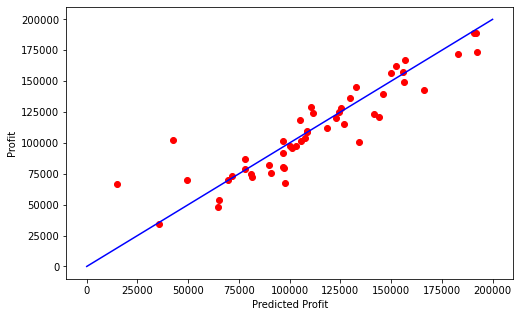

In [130]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, LR_pred1,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [131]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit
0,192261.830000,173426.181017
1,191792.060000,189136.035557
2,191050.390000,188946.035741
3,182901.990000,172036.552176
4,166187.940000,142782.308756
5,156991.120000,167404.746140
6,156122.510000,149507.668697
7,155752.600000,157587.392262
8,152211.770000,161999.462058
9,149759.960000,156553.515380


* #### Gradient Boosting Regressor

In [143]:
# Gradient Boosting Regressor model
GB = GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train, y_train)

# Model Prediction
GB_pred = GB.predict(X_test)

# Model R2 score
GBscore = GB.score(X_test, y_test)
GBscore

0.8719752936291995

In [134]:
# Model Metrics
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])
GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
2,Gradient Boosting Regressor,0.871975,8794.067752,1.235755e+08,11116.451707,0.015324,0.123789


In [135]:
# Test final predictions
GB_pred1 = GB.predict(X_Test)

In [136]:
# Model Metrics
GBMetrics1 = pd.DataFrame({'Model': 'GradientBoostingRegressor',
                           'r2score':r2_score(y,GB_pred1),
                           'MAE': metrics.mean_absolute_error (y,GB_pred1),
                           'MSE': metrics.mean_squared_error(y,GB_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,GB_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,GB_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,GB_pred1))             
                          },index=[1])
GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


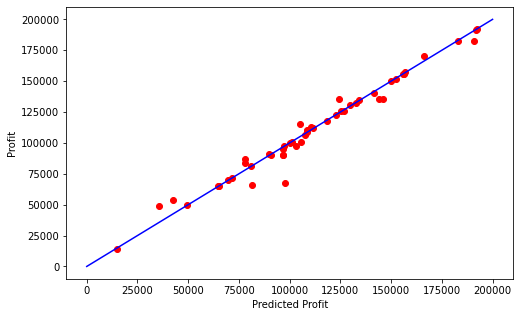

In [144]:
# visualisation of Test dataset predictions

# Plot outputs
# Test final predictions
plt.figure(figsize=(8,5))
pl.plot(y, GB_pred1,'ro')
pl.plot([0,200000],[0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

### Model comparison

In [145]:
# score comparison of models
frames = [LRMetrics1,GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.482250,2.756271e+08,16602.021239,0.077744,0.278826
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


In [50]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1, "GB Predicted Profit":GB_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

##  Conclusion.

In [146]:
# submission of .csv file with final predictions
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictions.csv', index=False)